In [5]:
import pandas as pd
from sklearn import datasets
import seaborn as sns

<Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>

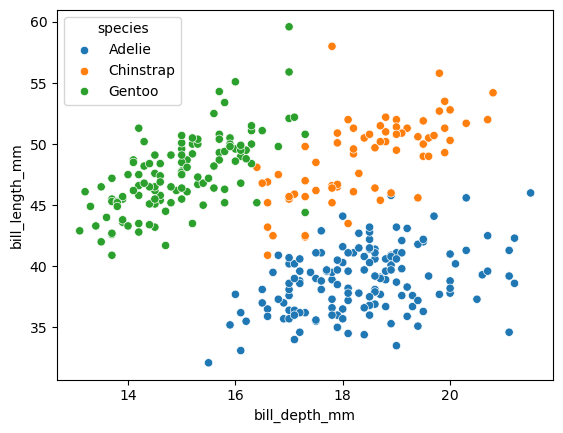

In [6]:
df = sns.load_dataset("penguins")
df = df.dropna()
df = df.drop_duplicates().reset_index(drop=True)
sns.scatterplot(x=df["bill_depth_mm"], y=df["bill_length_mm"], hue=df["species"])

In [7]:
df["island"].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [8]:
y = df["species"]
X = pd.get_dummies(df.drop("species", axis="columns"), drop_first=True)

In [9]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)
min_max = MinMaxScaler().fit(X_train)
X_train = min_max.transform(X_train)
X_test = min_max.transform(X_test)
X_train.shape, X_test.shape

((266, 7), (67, 7))

In [11]:
rf_parameters = {
    "n_estimators": (100, 150, 400, 1000),
    "max_depth": (None, 10, 20, 100)
}

log_parameters = {
    "C": (0.2, 0.5, 1.0, 5.0, 10.0),
}

clf_rf = GridSearchCV(RandomForestClassifier(), rf_parameters, scoring="balanced_accuracy")
clf_log = GridSearchCV(LogisticRegression(), log_parameters, scoring="balanced_accuracy")
clf_rf.fit(X_train, y_train)
clf_log.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': (0.2, 0.5, 1.0, 5.0, 10.0)},
             scoring='balanced_accuracy')

In [12]:
pd.DataFrame(clf_log.cv_results_).sort_values(by="mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.002614,0.000100,0.000245,0.000018,5.0,{'C': 5.0},1.0,1.000000,1.000000,1.000000,0.966667,0.993333,0.013333,1
4,0.002922,0.000214,0.000239,0.000015,10.0,{'C': 10.0},1.0,1.000000,1.000000,1.000000,0.966667,0.993333,0.013333,1
2,0.002121,0.000023,0.000230,0.000011,1.0,{'C': 1.0},1.0,0.969697,1.000000,1.000000,0.966667,0.987273,0.015617,3
1,0.001973,0.000068,0.000232,0.000011,0.5,{'C': 0.5},1.0,0.969697,0.969697,1.000000,0.966667,0.981212,0.015380,4
0,0.002046,0.000717,0.000265,0.000019,0.2,{'C': 0.2},1.0,0.969697,0.939394,0.969697,0.966667,0.969091,0.019204,5


In [13]:
pd.DataFrame(clf_rf.cv_results_).sort_values(by="mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.041992,0.001781,0.002290,0.000359,None,100,"{'max_depth': None, 'n_estimators': 100}",1.0,1.000000,1.0,1.0,0.966667,0.993333,0.013333,1
2,0.166037,0.002792,0.007280,0.000122,None,400,"{'max_depth': None, 'n_estimators': 400}",1.0,1.000000,1.0,1.0,0.966667,0.993333,0.013333,1
4,0.041027,0.000574,0.002140,0.000087,10,100,"{'max_depth': 10, 'n_estimators': 100}",1.0,1.000000,1.0,1.0,0.966667,0.993333,0.013333,1
6,0.163177,0.002376,0.007266,0.000241,10,400,"{'max_depth': 10, 'n_estimators': 400}",1.0,1.000000,1.0,1.0,0.966667,0.993333,0.013333,1
7,0.406072,0.009732,0.016924,0.000340,10,1000,"{'max_depth': 10, 'n_estimators': 1000}",1.0,1.000000,1.0,1.0,0.966667,0.993333,0.013333,1
8,0.040736,0.001047,0.002149,0.000162,20,100,"{'max_depth': 20, 'n_estimators': 100}",1.0,1.000000,1.0,1.0,0.966667,0.993333,0.013333,1
9,0.063453,0.000749,0.002963,0.000099,20,150,"{'max_depth': 20, 'n_estimators': 150}",1.0,1.000000,1.0,1.0,0.966667,0.993333,0.013333,1
10,0.164586,0.004612,0.006943,0.000080,20,400,"{'max_depth': 20, 'n_estimators': 400}",1.0,1.000000,1.0,1.0,0.966667,0.993333,0.013333,1
11,0.395278,0.001565,0.016654,0.000265,20,1000,"{'max_depth': 20, 'n_estimators': 1000}",1.0,1.000000,1.0,1.0,0.966667,0.993333,0.013333,1
12,0.039852,0.000183,0.001987,0.000076,100,100,"{'max_depth': 100, 'n_estimators': 100}",1.0,1.000000,1.0,1.0,0.966667,0.993333,0.013333,1


Se observa que tanto con LogiticRegression como con RandomForest se obtiene como máximo una *balanced_accuracy* del 0.99333. Por esta razón creo que lo óptimo es hacer un modelo de LogisticRegression que es más sencillo y menos pesado que un RandomForest.

In [14]:
from sklearn.metrics import balanced_accuracy_score
best_model = LogisticRegression(C=5.0).fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)
balanced_acc_test = balanced_accuracy_score(y_pred=y_test_pred, y_true=y_test)
print(f"La accuracy balanceada en test de nuestro modelo es: {balanced_acc_test*100:.1f}%")

La accuracy balanceada en test de nuestro modelo es: 100.0%


In [1]:
not None

True

In [17]:
X.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'island_Dream', 'island_Torgersen', 'sex_Male'],
      dtype='object')

In [16]:
import pickle
min_max_full = MinMaxScaler().fit(X)
filename = "log_regression_penguins.sav"
model_to_save = LogisticRegression(C=5.0).fit(min_max_full.transform(X), y)
pickle.dump(model_to_save, open(filename, 'wb'))
pickle.dump(min_max_full, open("min_max_scaler.sav", "wb"))

In [18]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
